# **Simple ML models using `sklearn`**

## **A simple ML model for regression problems**
Fish Market Dataset: https://www.kaggle.com/datasets/aungpyaeap/fish-market

Use this dataset to **predict fish weight**

### **Import libraries**

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

### **Explore data**

In [ ]:
# import a dataset
fish = pd.read_csv('fish.csv')
fish.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [ ]:
# check if there are any missing values
fish.isna().sum()   # don't have any missing values

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [ ]:
fish.shape

(159, 7)

In [ ]:
fish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [ ]:
fish.describe()    # all features seem following a normal distribution

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


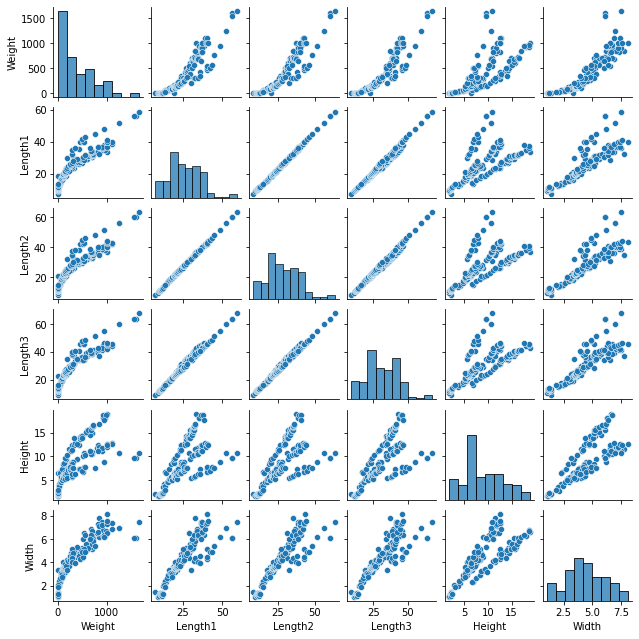

In [ ]:
sns.pairplot(fish, height=1.5);

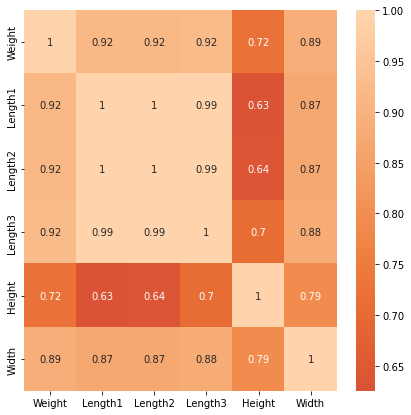

In [ ]:
corr_matrix = fish.corr()
plt.figure(figsize = (7,7))
sns.heatmap(data = corr_matrix, annot = True, center = 0);

From the pair plot and correlation matrix above, it can be seen that `Length1` and `Length2` are strongly correlated with each other (a correlation of 1).  The same goes for `Length2` and `Length3` (a correlation of 0.99). To avoid multicollinearity, I will select `Length1`, `Height`, and `Width` for the `Weight` prediction using linear regression.

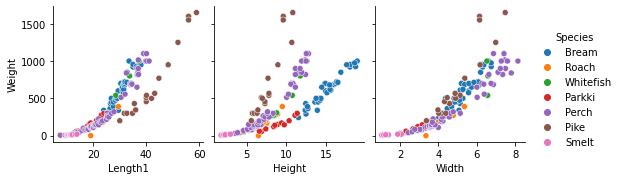

In [ ]:
sns.pairplot(fish, x_vars=['Length1', 'Height', 'Width'], y_vars=['Weight'], hue='Species');

### **Split data**

In [ ]:
# X = feature variables, y = a target variable
X = fish[['Length1', 'Height', 'Width']]
y = fish['Weight']

print(f"X: {X.shape}")

X: (159, 3)


In [ ]:
# train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.3, random_state = 7    # ~ set.seed in R
)

print(f"X_train: {X_train.shape}")
print(f"y_train: {y_train.shape}")
print(f"X_test:  {X_test.shape}")
print(f"y_test:  {y_test.shape}")

X_train: (111, 3)
y_train: (111,)
X_test:  (48, 3)
y_test:  (48,)


### **Model fitting**

In [ ]:
# model fitting -> linear regression
fish_model = LinearRegression()
fish_model.fit(X_train, y_train)

LinearRegression()

### **Model evaluation**

In [ ]:
# prediction
train_pred = fish_model.predict(X_train)
test_pred = fish_model.predict(X_test)

# model evaluation for training data
print('model evaluation for training data')
print(f'RMSE: {mean_squared_error(y_train, train_pred, squared=False).round(4)}')
print(f'R-squared: {fish_model.score(X_train, y_train).round(4)}')
print()

# model evaluation for testing data
print('model evaluation for testing data')
print(f'RMSE: {mean_squared_error(y_test, test_pred, squared=False).round(4)}')
print(f'R-squared: {fish_model.score(X_test, y_test).round(4)}')

model evaluation for training data
RMSE: 117.3626
R-squared: 0.8885

model evaluation for testing data
RMSE: 134.009
R-squared: 0.868


## **A simple ML model for classification problems**
Mushroom classification dataset: https://www.kaggle.com/datasets/uciml/mushroom-classification

Use this dataset to **classify** the mushrooms into **edible** and **poisonous**

### **Import libraries**

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

### **Explore data**

In [2]:
# import a dataset
mushrooms = pd.read_csv('mushrooms.csv')
mushrooms.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
# check if there are any missing values
mushrooms.isna().sum()   # no missing values

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [4]:
mushrooms.shape

(8124, 23)

In [5]:
mushrooms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [6]:
mushrooms.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [7]:
mushrooms['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

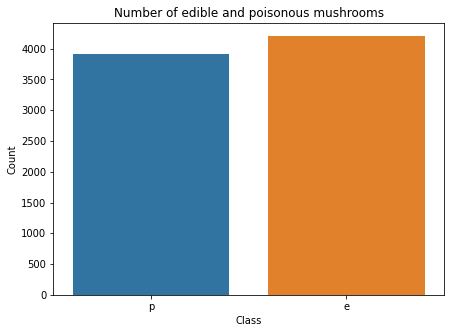

In [8]:
plt.figure(figsize=(7,5))
sns.countplot(data=mushrooms, x='class')
plt.title('Number of edible and poisonous mushrooms', fontsize=12)
plt.ylabel('Count', fontsize=10)
plt.xlabel('Class', fontsize=10)
plt.show()

### **Prepare data**

In [12]:
# convert columns to categorical type
mushrooms = mushrooms.astype('category')    
mushrooms.dtypes

class                       category
cap-shape                   category
cap-surface                 category
cap-color                   category
bruises                     category
odor                        category
gill-attachment             category
gill-spacing                category
gill-size                   category
gill-color                  category
stalk-shape                 category
stalk-root                  category
stalk-surface-above-ring    category
stalk-surface-below-ring    category
stalk-color-above-ring      category
stalk-color-below-ring      category
veil-type                   category
veil-color                  category
ring-number                 category
ring-type                   category
spore-print-color           category
population                  category
habitat                     category
dtype: object

In [13]:
# convert categorical values to numerical -> LabelEncoder
le = preprocessing.LabelEncoder()

for col in mushrooms.columns:
    mushrooms[col] = le.fit_transform(mushrooms[col])

mushrooms.head()    # all values are numerical

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [14]:
mushrooms.dtypes

class                       int64
cap-shape                   int64
cap-surface                 int64
cap-color                   int64
bruises                     int64
odor                        int64
gill-attachment             int64
gill-spacing                int64
gill-size                   int64
gill-color                  int64
stalk-shape                 int64
stalk-root                  int64
stalk-surface-above-ring    int64
stalk-surface-below-ring    int64
stalk-color-above-ring      int64
stalk-color-below-ring      int64
veil-type                   int64
veil-color                  int64
ring-number                 int64
ring-type                   int64
spore-print-color           int64
population                  int64
habitat                     int64
dtype: object

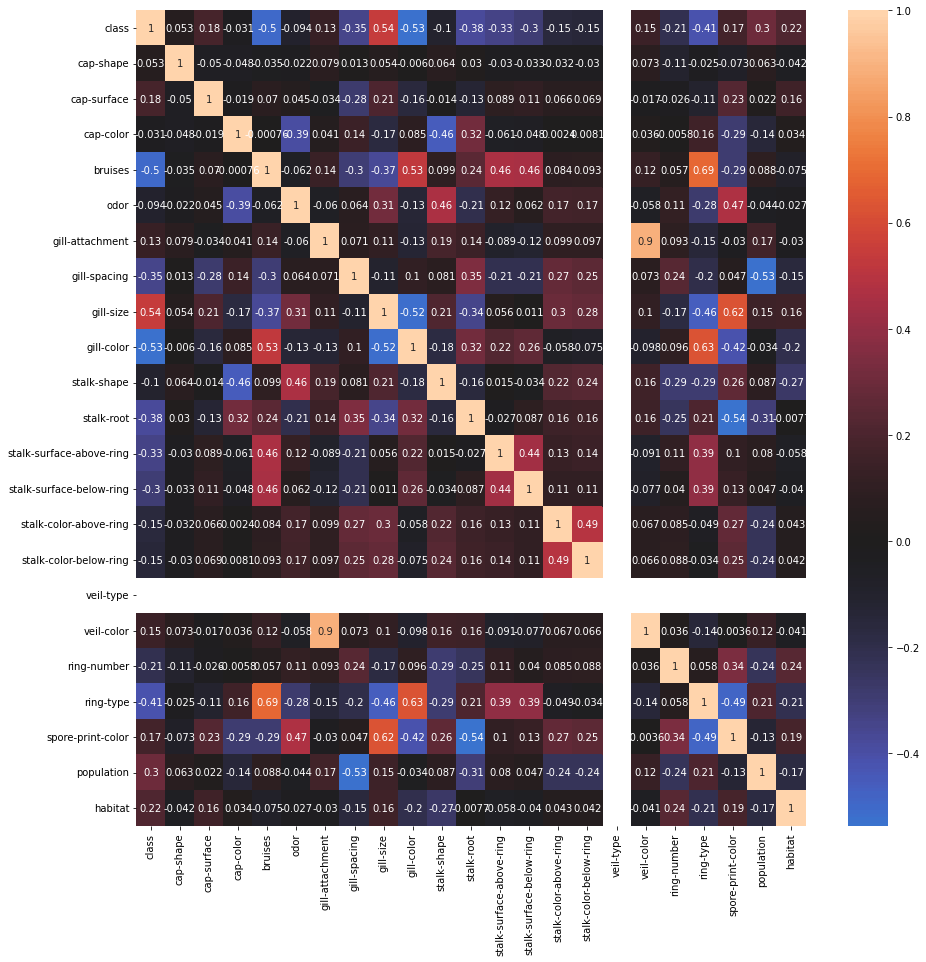

In [15]:
corr_matrix = mushrooms.corr()  # since dtypes is 'int64' (not 'object') -> .corr() can calculate the correlation
plt.figure(figsize = (15,15))
sns.heatmap(corr_matrix, annot = True, center = 0);

From the correlation matrix, it can be seen that `bruises`, `gill-size`, and `gill-color` are correlated with `class` (correlations of -0.5, 0.54, and -0.53 respectively)

### **Split data**

In [16]:
# X = feature variables, y = a target variable
X = mushrooms.drop(['class', 'veil-type'], axis=1)    # all values in veil-type are 0 
y = mushrooms['class']

print(f"X: {X.shape}")

X: (8124, 21)


In [20]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=88
)

print(f"X_train: {X_train.shape}")
print(f"y_train: {y_train.shape}")
print(f"X_test:  {X_test.shape}")
print(f"y_test:  {y_test.shape}")

X_train: (6499, 21)
y_train: (6499,)
X_test:  (1625, 21)
y_test:  (1625,)


### **Model fitting**

In [21]:
# model fitting -> random forest classifier
rf_mushrooms = RandomForestClassifier()
rf_mushrooms.fit(X_train, y_train)

RandomForestClassifier()

### **Model evaluation**

In [22]:
# prediction
y_test_pred = rf_mushrooms.predict(X_test)

# model evaluation for testing data
print('Testing Data - Random Forest Classifier report: \n')
print(classification_report(y_test, y_test, target_names=['e','p']))
print(f"Test accuracy: {int(rf_mushrooms.score(X_test, y_test) * 100)} %")

Testing Data - Random Forest Classifier report: 

              precision    recall  f1-score   support

           e       1.00      1.00      1.00       833
           p       1.00      1.00      1.00       792

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

Test accuracy: 100 %


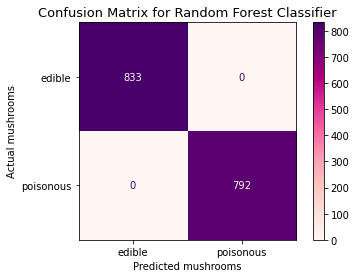

In [23]:
cm_disp_test = ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred, display_labels=['edible', 'poisonous'], cmap = 'RdPu')
plt.title('Confusion Matrix for Random Forest Classifier', fontsize=13)
plt.xlabel('Predicted mushrooms')
plt.ylabel('Actual mushrooms')
plt.show();